# Kernel SAX for ETT hourly dataset

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.kernel_sax import KernelSAX
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)

DATA_DIR = "./data/"
IMG_DIR = "./images/"

### Preprocessing functions

In [15]:
def load_dataset(file_path: str) -> pd.DataFrame:
    return pd.read_csv(file_path, index_col=0, parse_dates=True)

In [16]:
def test_stationarity(timeseries: pd.Series) -> bool:
    """
    Perform Augmented Dickey-Fuller test to check stationarity.
    """
    result = adfuller(timeseries, autolag='AIC')
    adf_statistic = result[0]
    p_value = result[1]
    print('Obtained p-value: {:.2f}'.format(p_value))
    if p_value <= 0.05:
        print('Series is stationary')
    else:
        print('Series in non-stationary')
    return p_value <= 0.05  # Stationary if p-value is small

In [17]:
def make_stationary(timeseries: pd.Series) -> pd.Series:
    """
    Apply differencing to make the time series stationary.
    """
    return timeseries.diff().dropna()

In [18]:
def process_time_series(file_path: str, col: str) -> pd.Series:
    """
    Main function to process the time series data.
    """
    # Load data
    data = load_dataset(file_path)
    timeseries = data[col]

    # Check stationarity
    if test_stationarity(timeseries):
        print("Time series is already stationary.")
        return timeseries
    else:
        print("Time series is not stationary. Making it stationary...")
        stationary_series = make_stationary(timeseries)
        return stationary_series

In [19]:
data = process_time_series(DATA_DIR+"ETT-small/ETTh1.csv", col='OT')
data.head()

Obtained p-value: 0.01
Series is stationary
Time series is already stationary.


date
2016-07-01 00:00:00    30.531000
2016-07-01 01:00:00    27.787001
2016-07-01 02:00:00    27.787001
2016-07-01 03:00:00    25.044001
2016-07-01 04:00:00    21.948000
Name: OT, dtype: float64

<Axes: xlabel='date'>

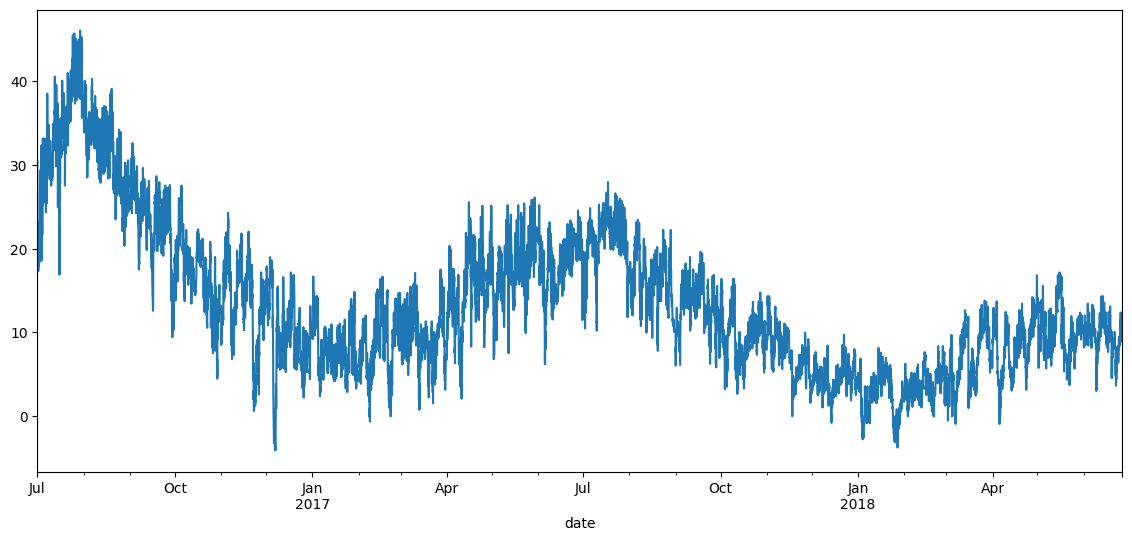

In [20]:
data.plot()

<Axes: xlabel='date'>

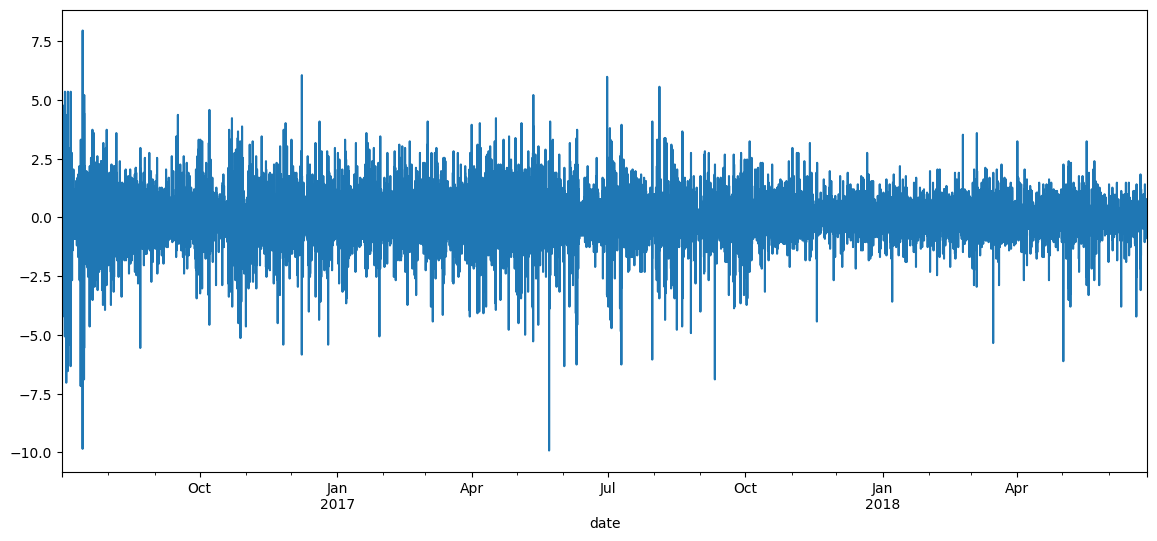

In [21]:
stationary_data = make_stationary(data)
stationary_data.plot()

In [8]:
decompose = sm.tsa.seasonal_decompose(data, model='additive', period=52)
trend = decompose.trend
seasonal = decompose.seasonal
trend = trend.fillna(method='ffill')
trend = trend.fillna(method='bfill')
seasonal = seasonal.fillna(method='ffill')
seasonal = seasonal.fillna(method='bfill')

/var/folders/hw/c3fmf0kj7jz9my8t1s68xlf00000gn/T/ipykernel_8573/1904705841.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trend = trend.fillna(method='ffill')
/var/folders/hw/c3fmf0kj7jz9my8t1s68xlf00000gn/T/ipykernel_8573/1904705841.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trend = trend.fillna(method='bfill')
/var/folders/hw/c3fmf0kj7jz9my8t1s68xlf00000gn/T/ipykernel_8573/1904705841.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seasonal = seasonal.fillna(method='ffill')
/var/folders/hw/c3fmf0kj7jz9my8t1s68xlf00000gn/T/ipykernel_8573/1904705841.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seasonal = seasonal

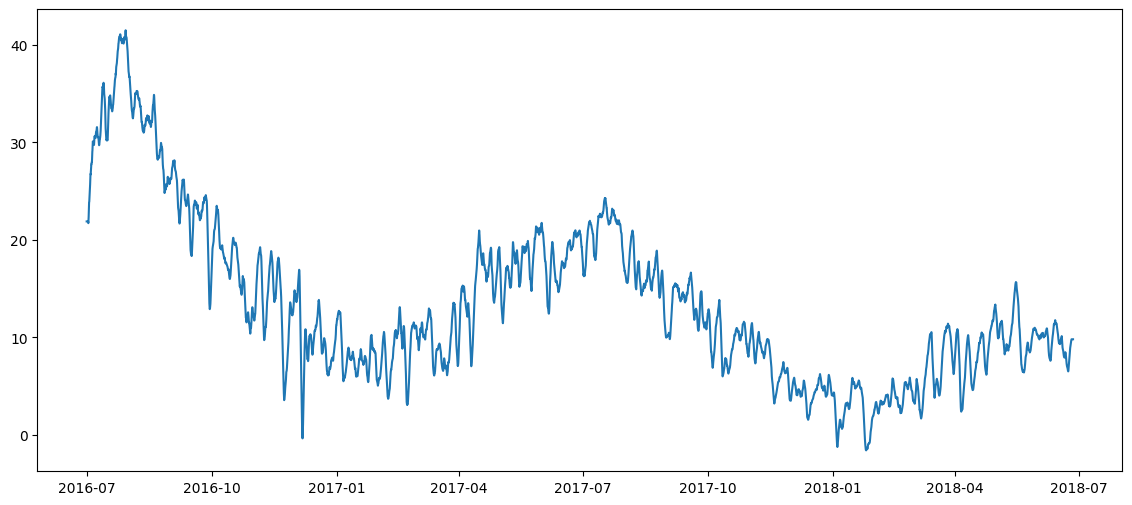

In [9]:
plt.plot(trend)

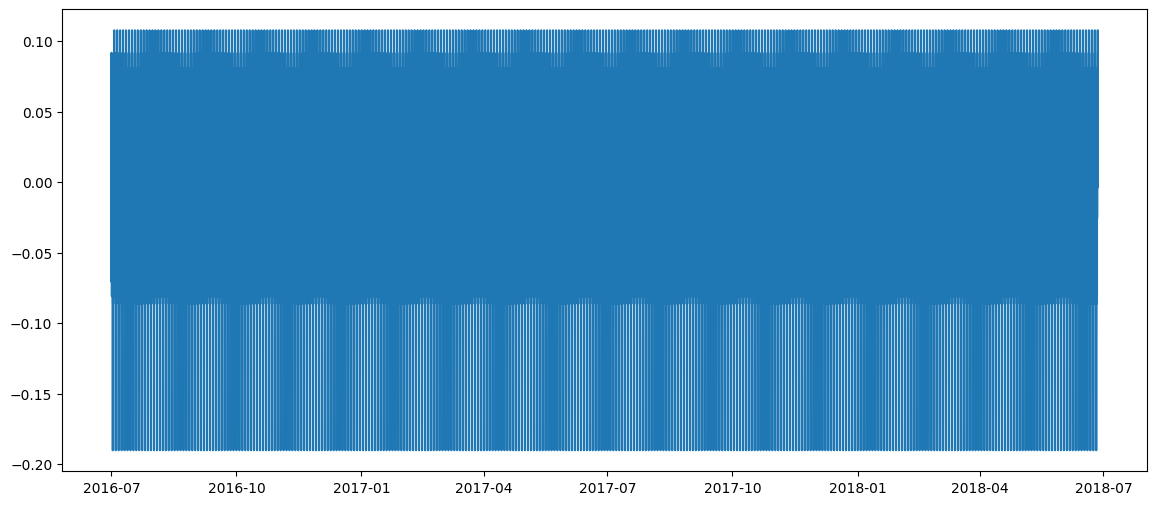

In [10]:
plt.plot(seasonal)

### Kernel SAX on Original Series

/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:125: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numerator = integrate.quad(
/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) o

Epoch 1, Boundaries delta: 18.7374409381, Codewords delta: 6.7644949982
Epoch 2, Boundaries delta: 3.3317486019, Codewords delta: 2.3824247167
Epoch 3, Boundaries delta: 2.0257177031, Codewords delta: 1.5981347771
Epoch 4, Boundaries delta: 1.4197480619, Codewords delta: 1.1176784891
Epoch 5, Boundaries delta: 1.0053479673, Codewords delta: 0.8722527157
Epoch 6, Boundaries delta: 0.7787009374, Codewords delta: 0.7839435623
Epoch 7, Boundaries delta: 0.7038204073, Codewords delta: 0.6557014453
Epoch 8, Boundaries delta: 0.5935747290, Codewords delta: 0.5643637830
Epoch 9, Boundaries delta: 0.5164663915, Codewords delta: 0.5121399888
Epoch 10, Boundaries delta: 0.4773265652, Codewords delta: 0.4250300193
Epoch 11, Boundaries delta: 0.4041009457, Codewords delta: 0.3506562938


/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:125: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  numerator = integrate.quad(


Epoch 12, Boundaries delta: 0.3455860710, Codewords delta: 0.3017251219
Epoch 13, Boundaries delta: 0.3014394187, Codewords delta: 0.2728210046
Epoch 14, Boundaries delta: 0.2698920113, Codewords delta: 0.2399304163


/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  denominator = integrate.quad(self.density_func, bi, bi_plus_1)[0]


Epoch 15, Boundaries delta: 0.2364666504, Codewords delta: 0.2327232747
Epoch 16, Boundaries delta: 0.2254666025, Codewords delta: 0.2094576740
Epoch 17, Boundaries delta: 0.2058971052, Codewords delta: 0.2124179193
Epoch 18, Boundaries delta: 0.2074498274, Codewords delta: 0.1995367193
Epoch 19, Boundaries delta: 0.1949582877, Codewords delta: 0.1723041094
Epoch 20, Boundaries delta: 0.1693297891, Codewords delta: 0.1750166251
Epoch 21, Boundaries delta: 0.1705268468, Codewords delta: 0.1621950356
Epoch 22, Boundaries delta: 0.1630494587, Codewords delta: 0.1622517914
Epoch 23, Boundaries delta: 0.1595494543, Codewords delta: 0.1614605001
Epoch 24, Boundaries delta: 0.1588763989, Codewords delta: 0.1578672146
Epoch 25, Boundaries delta: 0.1536026844, Codewords delta: 0.1393059919
Epoch 26, Boundaries delta: 0.1386319658, Codewords delta: 0.1416544940
Epoch 27, Boundaries delta: 0.1401771089, Codewords delta: 0.1424770471
Epoch 28, Boundaries delta: 0.1436162643, Codewords delta: 0.135

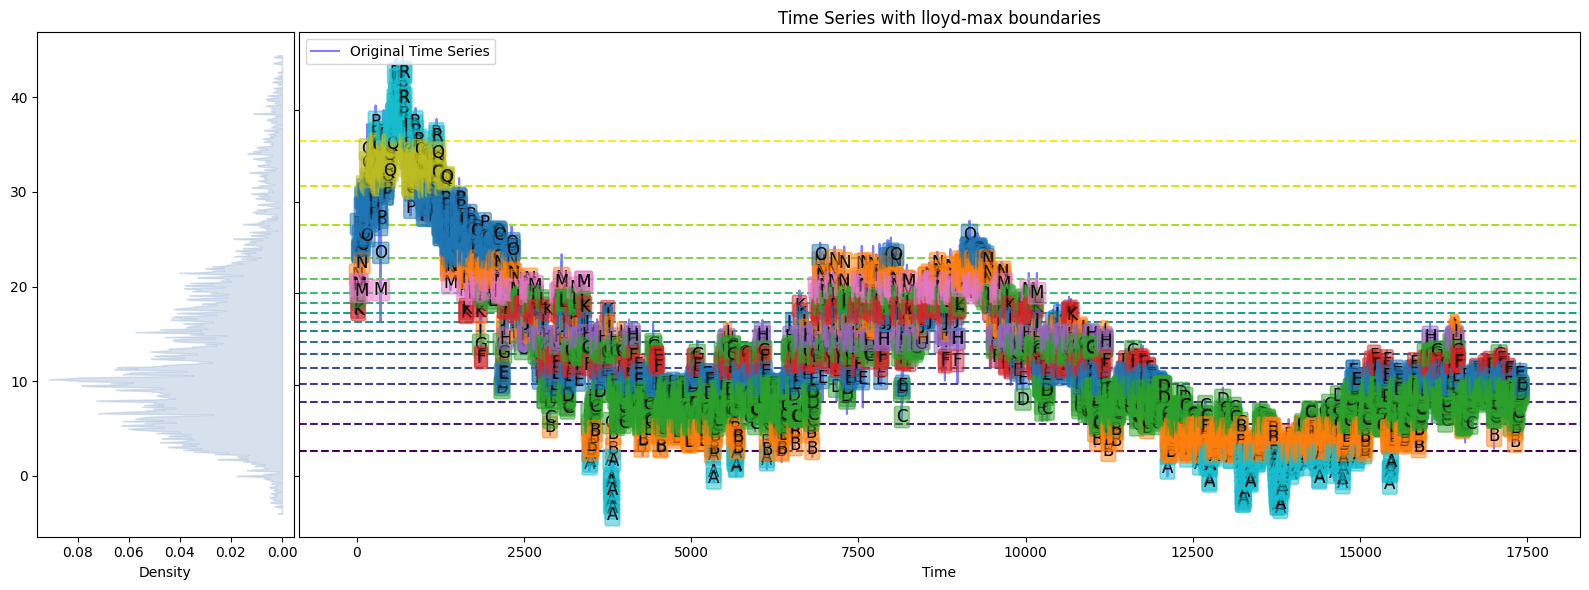

In [11]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=18, bandwidth=0.1, epochs=50, paa_window_size=4)
kernel_sax.fit(data.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETTh1_lloyd.png")
kernel_sax.save_alphabets(DATA_DIR+"ETTh1_lloyd.txt")
kernel_sax.text_to_df(start_datetime=str(data.index[0]), csv_path=DATA_DIR+"ETTh1_lloyd.csv")

In [ ]:
s = './data/ETTh1_lloyd.txt'
# Split the string on the period before 'csv'
base, extension = s.rsplit('.', 1)
new_path = f'{base}_boundaries.{extension}'

print(new_path)  # './data/ETTh1_lloyd_boundaries.csv'

### Kernel SAX for trend

/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:125: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numerator = integrate.quad(
/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) o

Epoch 1, Boundaries delta: 18.5812046901, Codewords delta: 6.0304146598
Epoch 2, Boundaries delta: 2.9414673361, Codewords delta: 2.1957579304
Epoch 3, Boundaries delta: 1.8564969167, Codewords delta: 1.5201129083
Epoch 4, Boundaries delta: 1.3184867390, Codewords delta: 1.0574527379
Epoch 5, Boundaries delta: 0.9374210362, Codewords delta: 0.8325173290
Epoch 6, Boundaries delta: 0.7422741842, Codewords delta: 0.7093941669
Epoch 7, Boundaries delta: 0.6410814691, Codewords delta: 0.6190688757
Epoch 8, Boundaries delta: 0.5633198695, Codewords delta: 0.5154871574
Epoch 9, Boundaries delta: 0.4817282571, Codewords delta: 0.4772816441
Epoch 10, Boundaries delta: 0.4502589014, Codewords delta: 0.3846350460
Epoch 11, Boundaries delta: 0.3676638506, Codewords delta: 0.3442185702


/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:125: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  numerator = integrate.quad(


Epoch 12, Boundaries delta: 0.3315851087, Codewords delta: 0.2807389528
Epoch 13, Boundaries delta: 0.2783325311, Codewords delta: 0.2384460274
Epoch 14, Boundaries delta: 0.2352727646, Codewords delta: 0.2194219895
Epoch 15, Boundaries delta: 0.2174527614, Codewords delta: 0.1771437621
Epoch 16, Boundaries delta: 0.1753816032, Codewords delta: 0.1771675902


/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  denominator = integrate.quad(self.density_func, bi, bi_plus_1)[0]


Epoch 17, Boundaries delta: 0.1754628127, Codewords delta: 0.1789915443
Epoch 18, Boundaries delta: 0.1788857606, Codewords delta: 0.1729639228
Epoch 19, Boundaries delta: 0.1722585225, Codewords delta: 0.1530147962
Epoch 20, Boundaries delta: 0.1541518241, Codewords delta: 0.1363807215
Epoch 21, Boundaries delta: 0.1354198647, Codewords delta: 0.1361726305
Epoch 22, Boundaries delta: 0.1372844766, Codewords delta: 0.1634717158
Epoch 23, Boundaries delta: 0.1623641750, Codewords delta: 0.1561770412
Epoch 24, Boundaries delta: 0.1536709492, Codewords delta: 0.1374056142
Epoch 25, Boundaries delta: 0.1354801736, Codewords delta: 0.1318579015
Epoch 26, Boundaries delta: 0.1309591976, Codewords delta: 0.1437557905
Epoch 27, Boundaries delta: 0.1409759754, Codewords delta: 0.1562248200
Epoch 28, Boundaries delta: 0.1513570899, Codewords delta: 0.1242025788
Epoch 29, Boundaries delta: 0.1213481766, Codewords delta: 0.1198951380
Epoch 30, Boundaries delta: 0.1177721669, Codewords delta: 0.123

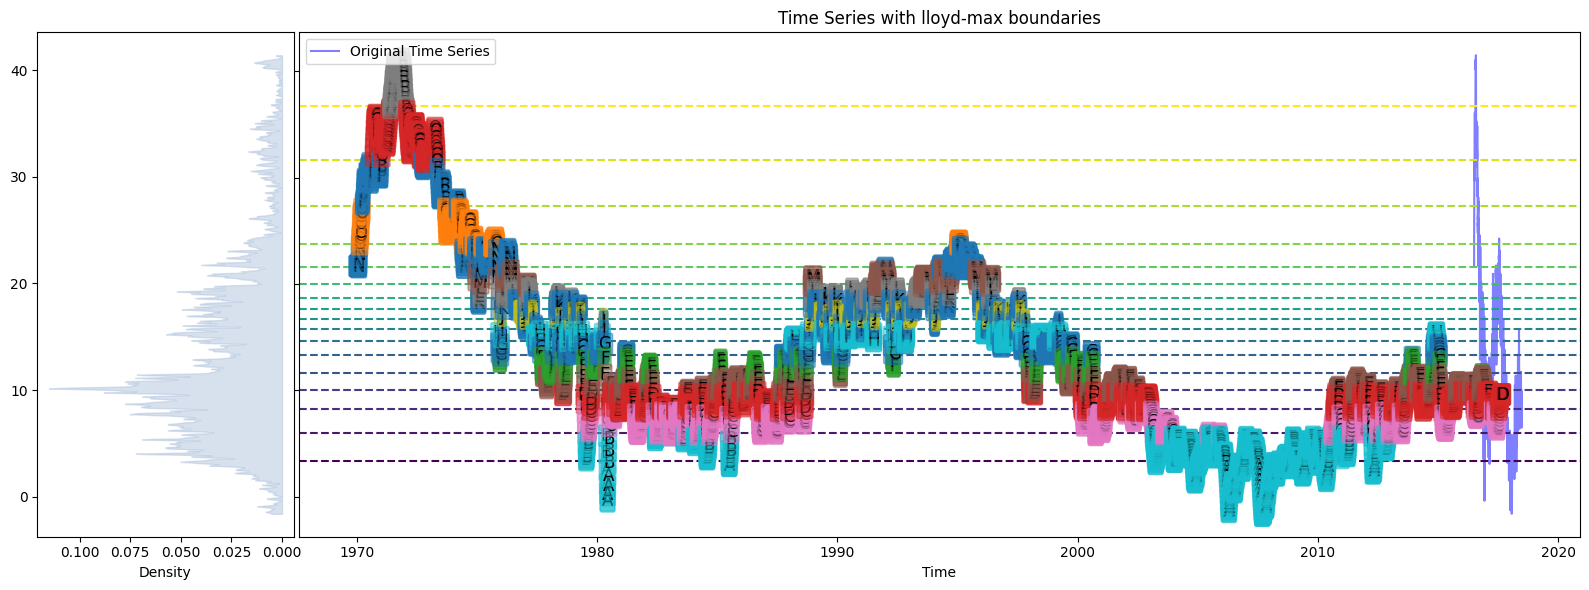

In [12]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=18, bandwidth=0.1, epochs=50, paa_window_size=4)
kernel_sax.fit(trend, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETTh1_lloyd_trend.png")
kernel_sax.save_alphabets(DATA_DIR+"ETTh1_lloyd_trend.txt")
kernel_sax.text_to_df(start_datetime=str(trend.index[0]), csv_path=DATA_DIR+"ETTh1_lloyd_trend.csv")

### Kernel SAX for seasonal

/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  denominator = integrate.quad(self.density_func, bi, bi_plus_1)[0]


Epoch 1, Boundaries delta: 0.0252112890, Codewords delta: 0.0169274103
Epoch 2, Boundaries delta: 0.0085237563, Codewords delta: 0.0067245036
Epoch 3, Boundaries delta: 0.0054608319, Codewords delta: 0.0046111713
Epoch 4, Boundaries delta: 0.0039526085, Codewords delta: 0.0034017310
Epoch 5, Boundaries delta: 0.0030451148, Codewords delta: 0.0026382629
Epoch 6, Boundaries delta: 0.0024209619, Codewords delta: 0.0021893939
Epoch 7, Boundaries delta: 0.0020281787, Codewords delta: 0.0018731075
Epoch 8, Boundaries delta: 0.0017340318, Codewords delta: 0.0016173050
Epoch 9, Boundaries delta: 0.0015183970, Codewords delta: 0.0014057184
Epoch 10, Boundaries delta: 0.0013522346, Codewords delta: 0.0012342182
Epoch 11, Boundaries delta: 0.0012069099, Codewords delta: 0.0010883526
Epoch 12, Boundaries delta: 0.0010790905, Codewords delta: 0.0009763085
Epoch 13, Boundaries delta: 0.0009663112, Codewords delta: 0.0008865427
Epoch 14, Boundaries delta: 0.0008666965, Codewords delta: 0.0008054722
E

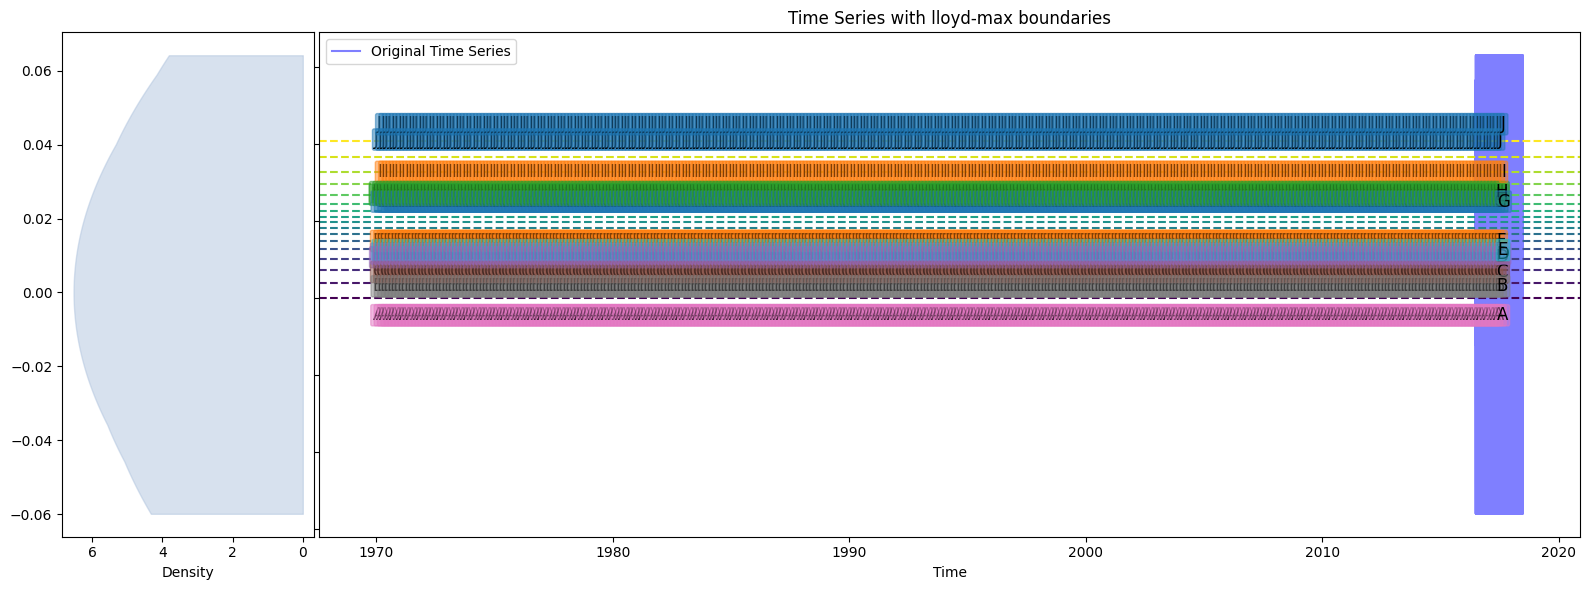

In [13]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=18, bandwidth=0.1, epochs=50, paa_window_size=4)
kernel_sax.fit(seasonal, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETTh1_lloyd_seasonal.png")
kernel_sax.save_alphabets(DATA_DIR+"ETTh1_lloyd_seasonal.txt")
kernel_sax.text_to_df(start_datetime=str(seasonal.index[0]), csv_path=DATA_DIR+"ETTh1_lloyd_seasonal.csv")

### Kernel SAX for Stationary Data

/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:125: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numerator = integrate.quad(
/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) o

Epoch 1, Boundaries delta: 0.9365638789, Codewords delta: 0.7069247063


/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:125: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  numerator = integrate.quad(
/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  denominator = integrate.quad(self.density_func, bi, bi_plus_1)[0]


Epoch 2, Boundaries delta: 0.3402363252, Codewords delta: 0.1841657877
Epoch 3, Boundaries delta: 0.1697606084, Codewords delta: 0.1148503716
Epoch 4, Boundaries delta: 0.1084863620, Codewords delta: 0.0837151573
Epoch 5, Boundaries delta: 0.0788261530, Codewords delta: 0.0648570537
Epoch 6, Boundaries delta: 0.0598866787, Codewords delta: 0.0524472054
Epoch 7, Boundaries delta: 0.0482539186, Codewords delta: 0.0443827101
Epoch 8, Boundaries delta: 0.0401854067, Codewords delta: 0.0384841769
Epoch 9, Boundaries delta: 0.0342783601, Codewords delta: 0.0339263434
Epoch 10, Boundaries delta: 0.0301317685, Codewords delta: 0.0298400440
Epoch 11, Boundaries delta: 0.0267083024, Codewords delta: 0.0263894885
Epoch 12, Boundaries delta: 0.0240832749, Codewords delta: 0.0238932266
Epoch 13, Boundaries delta: 0.0220078287, Codewords delta: 0.0224478060
Epoch 14, Boundaries delta: 0.0206225487, Codewords delta: 0.0212150957
Epoch 15, Boundaries delta: 0.0193959107, Codewords delta: 0.0195355092


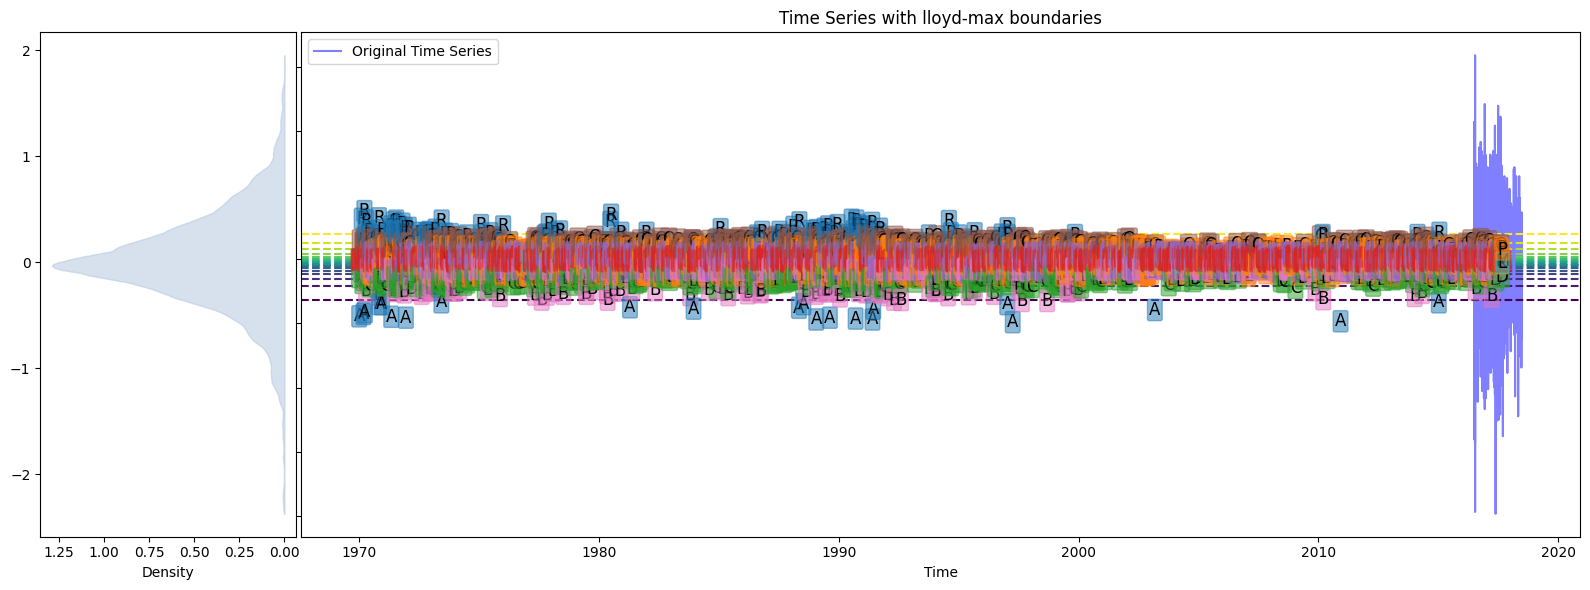

In [22]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=18, bandwidth=0.1, epochs=50, paa_window_size=4)
kernel_sax.fit(stationary_data, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETTh1_lloyd_stationary.png")
kernel_sax.save_alphabets(DATA_DIR+"ETTh1_lloyd_stationary.txt")
kernel_sax.text_to_df(start_datetime=str(seasonal.index[0]), csv_path=DATA_DIR+"ETTh1_lloyd_stationary.csv")

In [ ]:
kernel_sax

In [ ]:
new_data = pd.read_csv(DATA_DIR+"ETTh1_lloyd.csv", index_col='timestamp')

In [ ]:
new_data['encoded_alphabets'][:500].plot()

In [ ]:
def load_text_data(file_path: str) -> str:
    """
    Load character level text data from a file.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        text_data = file.read()
    return text_data

In [ ]:
def split_text_data(text_data: str, train_ratio: float=0.8) -> tuple:
    """
    Split text data into train and test datasets sequentially.
    
    :param text_data: The complete character-level text data.
    :param train_ratio: Ratio of data to be used for training (default is 0.8).
    :return: train_data, test_data
    """
    # Calculate the split index
    split_index = int(len(text_data) * train_ratio)
    
    # Split the data
    train_data = text_data[:split_index]
    test_data = text_data[split_index:]
    
    return train_data, test_data

In [ ]:
ETTh1_text_data = load_text_data(DATA_DIR + 'ETTh1_lloyd.txt')

In [ ]:
ETTh1_text_data[:100]

In [ ]:
ETTh1_train, ETTh1_test = split_text_data(ETTh1_text_data)
print(f"Train text len: {len(ETTh1_train)}, test text len: {len(ETTh1_test)}")

In [ ]:
def calculate_vocab_size(text_data):
    """
    Calculate the vocabulary size from the text data.
    """
    return len(set(text_data))

def suggest_sequence_length(text_data, num_samples=1000):
    """
    Suggest a sequence length based on the average length of sentences/phrases in the text data.
    """
    # Split the text into sentences or phrases
    sentences = text_data.split('\n')  # Assuming each line is a sentence/phrase
    sample_sentences = sentences[:num_samples]  # Sample a subset for analysis

    # Calculate average length
    avg_length = sum(len(sentence) for sentence in sample_sentences) / len(sample_sentences)
    return int(avg_length)

# Usage with the training data
vocab_size = calculate_vocab_size(ETTh1_train)
suggested_seq_len = suggest_sequence_length(ETTh1_train)

print(vocab_size, suggested_seq_len)


In [ ]:
def save_data_to_file(data: list, file_path: str) -> None:
    """
    Save the given data to a text file.

    Args:
        data (str): The text data to be saved.
        file_path (str): Path of the file where the data will be saved.
    """
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(data)
    print(f"Saved data to {file_path}")

# Usage
train_file_path = DATA_DIR +  'ETTh1_train.txt'  
test_file_path = DATA_DIR + 'ETTh1_test.txt'   

# Saving the data
save_data_to_file(ETTh1_train, train_file_path)
save_data_to_file(ETTh1_test, test_file_path)

In [ ]:
char_to_idx = {char: idx for idx, char in enumerate(sorted(set(ETTh1_text_data)))}

# Convert all characters in the data to their corresponding index
indexed_data = [char_to_idx[char] for char in ETTh1_text_data]

# Creating a DataFrame for plotting
df = pd.DataFrame(indexed_data, columns=['Character Index'])

# Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Character Index'], label='Character Index')
plt.title('Character Index Time Series')
plt.xlabel('Time Step')
plt.ylabel('Character Index')
plt.legend()
plt.show()